# Psychometric Profiling of Online Gamers from Anxiety and Behavioural Patterns

## **Import Libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

## **Uploading Data**

In [10]:
df = pd.read_csv('Datasets/GamingStudy_data.csv', encoding = 'ISO-8859-1')

In [11]:
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

# **EDA**

In [13]:
px.scatter(df, x="Hours", y="Work")


# **Data Preparation and Cleaning**

In [14]:
df['highestleague'].value_counts()

Series([], Name: highestleague, dtype: int64)

In [15]:
df.drop(columns = ['highestleague','S. No.'],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        13464 non-null  float64
 1   GAD1             13464 non-null  int64  
 2   GAD2             13464 non-null  int64  
 3   GAD3             13464 non-null  int64  
 4   GAD4             13464 non-null  int64  
 5   GAD5             13464 non-null  int64  
 6   GAD6             13464 non-null  int64  
 7   GAD7             13464 non-null  int64  
 8   GADE             12815 non-null  object 
 9   SWL1             13464 non-null  int64  
 10  SWL2             13464 non-null  int64  
 11  SWL3             13464 non-null  int64  
 12  SWL4             13464 non-null  int64  
 13  SWL5             13464 non-null  int64  
 14  Game             13464 non-null  object 
 15  Platform         13464 non-null  object 
 16  Hours            13434 non-null  float64
 17  earnings    

Check For Missing Values

In [17]:
df.isnull().sum()

Timestamp             0
GAD1                  0
GAD2                  0
GAD3                  0
GAD4                  0
GAD5                  0
GAD6                  0
GAD7                  0
GADE                649
SWL1                  0
SWL2                  0
SWL3                  0
SWL4                  0
SWL5                  0
Game                  0
Platform              0
Hours                30
earnings              0
whyplay               0
League             1838
streams             100
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Gender                0
Age                   0
Work            

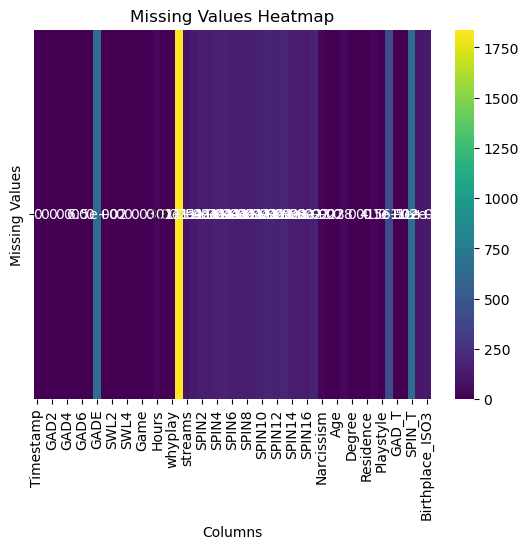

In [18]:
ms_v = df.isnull().sum()

# Convert the Series to a DataFrame
ms_v_df = ms_v.reset_index()
ms_v_df.columns = ['Columns', 'Missing Values']

# Reshape the DataFrame for the heatmap
# Transpose and convert to a DataFrame with a single row
ms_v_heatmap = ms_v_df.set_index('Columns').T

sns.heatmap(ms_v_heatmap, annot=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
num_col = []
for i in range (1,18):
  num_col.append(f"SPIN{i}")

In [13]:
print(num_col)

['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17']


In [14]:
additional_cols = ['Hours','streams','Narcissism','SPIN_T']

In [15]:
numerical_imputer = SimpleImputer(missing_values=np.nan , strategy = 'mean')
num_col.extend(additional_cols)
print(num_col)

['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Hours', 'streams', 'Narcissism', 'SPIN_T']


In [16]:
for i in num_col:
  df[num_col] = numerical_imputer.fit_transform(df[num_col])


In [17]:
df.isnull().sum()

Timestamp             0
GAD1                  0
GAD2                  0
GAD3                  0
GAD4                  0
GAD5                  0
GAD6                  0
GAD7                  0
GADE                649
SWL1                  0
SWL2                  0
SWL3                  0
SWL4                  0
SWL5                  0
Game                  0
Platform              0
Hours                 0
earnings              0
whyplay               0
League             1838
streams               0
SPIN1                 0
SPIN2                 0
SPIN3                 0
SPIN4                 0
SPIN5                 0
SPIN6                 0
SPIN7                 0
SPIN8                 0
SPIN9                 0
SPIN10                0
SPIN11                0
SPIN12                0
SPIN13                0
SPIN14                0
SPIN15                0
SPIN16                0
SPIN17                0
Narcissism            0
Gender                0
Age                   0
Work            

Solving Categorical Missing Values with Mode

In [18]:
categorical_imputer = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
categ_cols = ['GADE','League','Work','Degree','Reference','accept','Residence_ISO3','Birthplace_ISO3']

In [19]:
for i in categ_cols:
  df[categ_cols] = categorical_imputer.fit_transform(df[categ_cols])

In [20]:
df.isnull().sum()

Timestamp          0
GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism         0
Gender             0
Age                0
Work               0
Degree             0
Birthplace         0
Residence          0
Reference          0
Playstyle          0
accept       

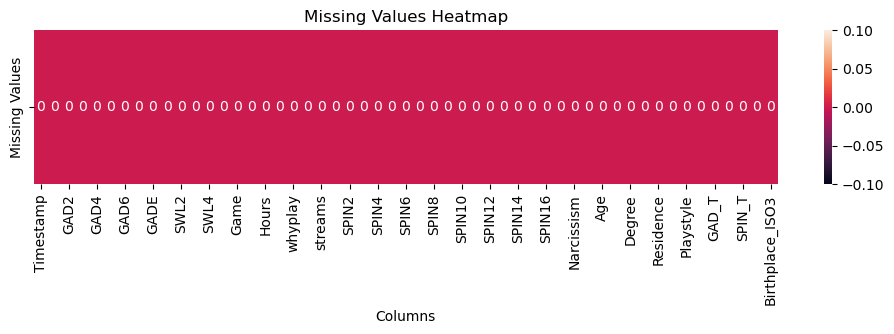

In [21]:
ms_v = df.isnull().sum()

# Convert the Series to a DataFrame
ms_v_df = ms_v.reset_index()
ms_v_df.columns = ['Columns', 'Missing Values']

# Reshape the DataFrame for the heatmap
# Transpose and convert to a DataFrame with a single row
ms_v_heatmap = ms_v_df.set_index('Columns').T
plt.figure(figsize=(12, 2))
sns.heatmap(ms_v_heatmap, annot=True)
plt.title('Missing Values Heatmap')
plt.show()

**Removing Duplicates**

In [22]:
duplicated_counts=df.duplicated().sum()
duplicated_counts

2

In [23]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

  Encoding Categorical Columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13462 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        13462 non-null  float64
 1   GAD1             13462 non-null  int64  
 2   GAD2             13462 non-null  int64  
 3   GAD3             13462 non-null  int64  
 4   GAD4             13462 non-null  int64  
 5   GAD5             13462 non-null  int64  
 6   GAD6             13462 non-null  int64  
 7   GAD7             13462 non-null  int64  
 8   GADE             13462 non-null  object 
 9   SWL1             13462 non-null  int64  
 10  SWL2             13462 non-null  int64  
 11  SWL3             13462 non-null  int64  
 12  SWL4             13462 non-null  int64  
 13  SWL5             13462 non-null  int64  
 14  Game             13462 non-null  object 
 15  Platform         13462 non-null  object 
 16  Hours            13462 non-null  float64
 17  earnings    

In [25]:
object_cols = df.select_dtypes(include='object')
object_cols.columns

Index(['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'Gender',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_cols:
  df[i] = le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13462 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        13462 non-null  float64
 1   GAD1             13462 non-null  int64  
 2   GAD2             13462 non-null  int64  
 3   GAD3             13462 non-null  int64  
 4   GAD4             13462 non-null  int64  
 5   GAD5             13462 non-null  int64  
 6   GAD6             13462 non-null  int64  
 7   GAD7             13462 non-null  int64  
 8   GADE             13462 non-null  int32  
 9   SWL1             13462 non-null  int64  
 10  SWL2             13462 non-null  int64  
 11  SWL3             13462 non-null  int64  
 12  SWL4             13462 non-null  int64  
 13  SWL5             13462 non-null  int64  
 14  Game             13462 non-null  int32  
 15  Platform         13462 non-null  int32  
 16  Hours            13462 non-null  float64
 17  earnings    

# Using the dendrogram to find the optimal number of clusters


In [27]:
import scipy.cluster.hierarchy as sch


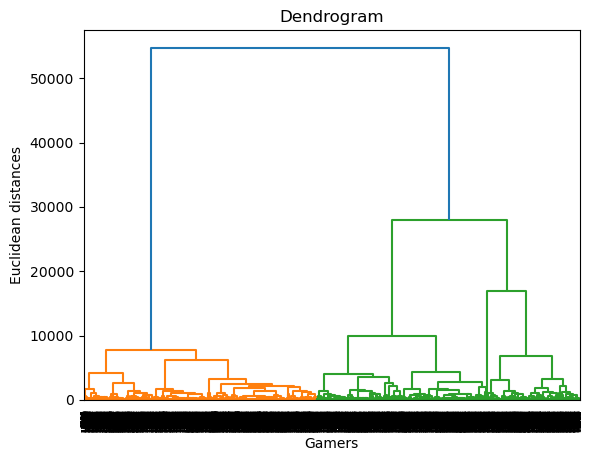

In [28]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Gamers')
plt.ylabel('Euclidean distances')
plt.show()

# **Training the Hierarchical Clustering model on the dataset**

In [29]:
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering model with Ward linkage (default Euclidean)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit and predict cluster labels
labels_hc = hc.fit_predict(df)

In [50]:
df['Clusters_Label'] = labels_hc
df.head()

ValueError: Length of values (13462) does not match length of index (13464)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13462 entries, 0 to 13463
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        13462 non-null  float64
 1   GAD1             13462 non-null  int64  
 2   GAD2             13462 non-null  int64  
 3   GAD3             13462 non-null  int64  
 4   GAD4             13462 non-null  int64  
 5   GAD5             13462 non-null  int64  
 6   GAD6             13462 non-null  int64  
 7   GAD7             13462 non-null  int64  
 8   GADE             13462 non-null  int32  
 9   SWL1             13462 non-null  int64  
 10  SWL2             13462 non-null  int64  
 11  SWL3             13462 non-null  int64  
 12  SWL4             13462 non-null  int64  
 13  SWL5             13462 non-null  int64  
 14  Game             13462 non-null  int32  
 15  Platform         13462 non-null  int32  
 16  Hours            13462 non-null  float64
 17  earnings    

In [32]:
X = df.drop(columns = ['Clusters_Label'])
y = df['Clusters_Label']

In [33]:
labels = y.unique()
labels

array([1, 0, 2], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Model Building**

In [35]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [36]:
def calculateMetrics(algorithm, testY, predict):
    testY = testY.astype('int')
    predict = predict.astype('int')

    p = precision_score(testY, predict, average='macro') * 100
    r = recall_score(testY, predict, average='macro') * 100
    f = f1_score(testY, predict, average='macro') * 100
    a = accuracy_score(testY, predict) * 100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)

    print(algorithm + ' Accuracy    : ' + str(a))
    print(algorithm + ' Precision   : ' + str(p))
    print(algorithm + ' Recall      : ' + str(r))
    print(algorithm + ' FSCORE      : ' + str(f))

    # Convert labels to strings
    labels = [str(label) for label in np.unique(testY)]

    # Generate classification report
    report = classification_report(testY, predict, target_names=labels)  # Fix order of arguments
    print('\n', algorithm + " Classification Report\n", report)

    # Confusion matrix
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize=(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap="Blues", fmt="g")
    ax.set_ylim([0, len(labels)])
    plt.title(algorithm + " Confusion Matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()


SVC Model loaded successfully.
SVC Classifier Accuracy    : 94.28147047901967
SVC Classifier Precision   : 94.22558848707206
SVC Classifier Recall      : 91.42994710025451
SVC Classifier FSCORE      : 92.57860508229459

 SVC Classifier Classification Report
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       496
           1       0.97      1.00      0.99      1265
           2       0.90      0.94      0.92       932

    accuracy                           0.94      2693
   macro avg       0.94      0.91      0.93      2693
weighted avg       0.94      0.94      0.94      2693



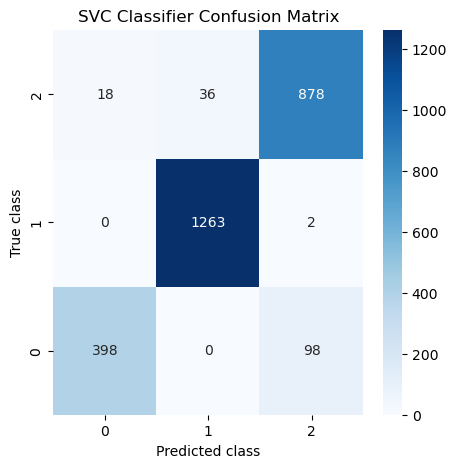

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os

# Standardize the dataset
scaler = StandardScaler()      # call
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check if the trained model exists
if os.path.exists('model/SVC.pkl'):
    # Load the trained model from the file
    svc = joblib.load('model/SVC.pkl')
    print("SVC Model loaded successfully.")
else:
    # Train SVC model
    svc = SVC(kernel='poly')  # You can change kernel to 'rbf', 'poly', etc.
    svc.fit(X_train_scaled, y_train)

    # Save the trained model
    joblib.dump(svc, 'model/SVC.pkl')
    print("SVC Model saved successfully.")

# Predict using SVC
predict = svc.predict(X_test_scaled)
calculateMetrics("SVC Classifier", y_test, predict)


LGBMClassifier model loaded successfully.
LGBM Classifier Accuracy    : 99.77720014853323
LGBM Classifier Precision   : 99.75077463533725
LGBM Classifier Recall      : 99.79554513402495
LGBM Classifier FSCORE      : 99.77285093546988

 LGBM Classifier Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       494
           1       1.00      1.00      1.00      1263
           2       1.00      0.99      1.00       936

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



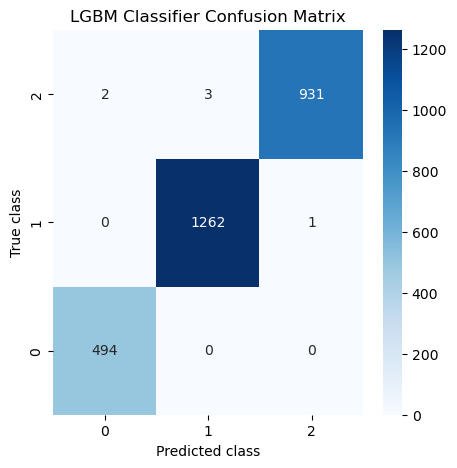

In [44]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import joblib, os, pickle

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'model/standard_scaler.pkl')

model_path = 'model/LGBMClassifier.pkl'

if os.path.exists(model_path):
    
    lgbm = joblib.load(model_path)
    print("LGBMClassifier model loaded successfully.")
else:
    lgbm = LGBMClassifier()
    lgbm.fit(X_train_scaled, y_train)
    
    joblib.dump(lgbm, model_path)
    print("LGBMClassifier model saved successfully.")

predict = lgbm.predict(X_test_scaled)

calculateMetrics("LGBM Classifier", predict, y_test)

In [45]:
test = pd.read_csv('Datasets/test.csv')
test

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,42054.72770,0,0,0,0,0,0,0,1,2,...,37,32,2,121,0,0,11,7.0,33,39
1,42054.79559,2,1,3,3,3,2,1,1,5,...,20,18,2,121,0,15,24,49.0,19,22
2,42054.80122,0,0,1,1,0,1,0,1,3,...,39,34,2,121,0,3,12,14.0,23,28
3,42054.79873,0,0,0,0,0,2,0,2,2,...,116,102,2,114,0,2,11,0.0,35,41
4,42054.64704,1,0,0,0,0,1,0,1,2,...,116,102,2,114,0,2,10,14.0,35,41
5,42054.77571,1,0,0,1,0,2,1,2,5,...,95,82,2,111,0,5,28,34.0,85,99
6,42054.76514,0,0,0,0,0,0,0,1,5,...,39,34,2,114,0,0,25,8.0,23,28
7,42054.78110,0,0,0,0,0,1,0,1,6,...,39,34,2,111,0,1,29,13.0,23,28
8,42054.73142,1,0,0,0,0,1,0,1,3,...,117,103,2,121,0,2,17,18.0,102,117
9,42054.95500,1,0,1,0,0,2,0,2,6,...,10,8,2,114,0,4,23,25.0,5,7


In [46]:
test_scaled = scaler.transform(test)


In [47]:
predict = lgbm.predict(test_scaled)
predict

array([2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2], dtype=int64)

In [48]:
test['Predications'] = predict
test

,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,...,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,Predications
0,42054.72770,0,0,0,0,0,0,0,1,2,...,32,2,121,0,0,11,7.0,33,39,2
1,42054.79559,2,1,3,3,3,2,1,1,5,...,18,2,121,0,15,24,49.0,19,22,2
2,42054.80122,0,0,1,1,0,1,0,1,3,...,34,2,121,0,3,12,14.0,23,28,1
3,42054.79873,0,0,0,0,0,2,0,2,2,...,102,2,114,0,2,11,0.0,35,41,0
4,42054.64704,1,0,0,0,0,1,0,1,2,...,102,2,114,0,2,10,14.0,35,41,0
5,42054.77571,1,0,0,1,0,2,1,2,5,...,82,2,111,0,5,28,34.0,85,99,1
6,42054.76514,0,0,0,0,0,0,0,1,5,...,34,2,114,0,0,25,8.0,23,28,1
7,42054.78110,0,0,0,0,0,1,0,1,6,...,34,2,111,0,1,29,13.0,23,28,1
8,42054.73142,1,0,0,0,0,1,0,1,3,...,103,2,121,0,2,17,18.0,102,117,2
9,42054.95500,1,0,1,0,0,2,0,2,6,...,8,2,114,0,4,23,25.0,5,7,0
